        ┌──────┐┌─────┐┌─────┐┌─────────┐┌──────────┐┌──────────┐
  qd_0: ┤0     ├┤0    ├┤0    ├┤0        ├┤0         ├┤0         ├
        │      ││     ││     ││         ││          ││          │
  qd_1: ┤1 QFT ├┤1 ZD ├┤1 ZD ├┤1 QFT_DG ├┤1 BARRIER ├┤1         ├
        │      ││     ││     ││         ││          ││          │
  qd_2: ┤2     ├┤2    ├┤2    ├┤2        ├┤2         ├┤2         ├
        └──────┘└─────┘└─────┘└─────────┘└──────────┘│  MEASURE │
meas_0: ═════════════════════════════════════════════╡0         ╞
                                                     │          │
meas_1: ═════════════════════════════════════════════╡1         ╞
                                                     │          │
meas_2: ═════════════════════════════════════════════╡2         ╞
                                                     └──────────┘


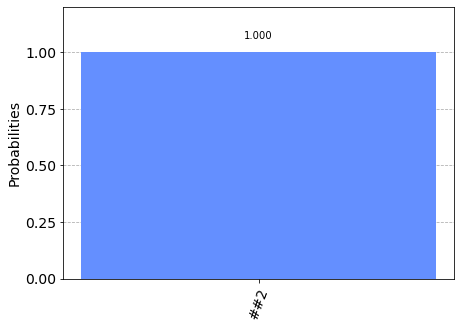

In [10]:
from qiskit_qudits import QuditCircuit
qdc = QuditCircuit([8], 0)
qdc.xd(0, 2)
qdc.measure_all()
print(qdc)


from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
from qiskit_qudits.visualization import counts_to_quditcounts

simulator = Aer.get_backend('qasm_simulator') #simulation part
job = execute(qdc, simulator, shots=99)
counts = job.result().get_counts()
qd_counts = counts_to_quditcounts(qdc, counts)
plot_histogram(qd_counts)

        ┌──────────┐┌──────────┐┌──────────┐   
  qd_0: ┤0         ├┤0         ├┤0         ├───
        │          ││          ││          │   
  qd_1: ┤1         ├┤1 BARRIER ├┤1         ├───
        │  LS(0,6) ││          ││          │   
  qd_2: ┤2         ├┤2         ├┤2         ├───
        │          │└────░─────┘│          │┌─┐
   q_0: ┤3         ├─────░──────┤  MEASURE ├┤M├
        └──────────┘     ░      │          │└╥┘
meas_0: ════════════════════════╡0         ╞═╬═
                                │          │ ║ 
meas_1: ════════════════════════╡1         ╞═╬═
                                │          │ ║ 
meas_2: ════════════════════════╡2         ╞═╬═
                                └──────────┘ ║ 
meas_3: ═════════════════════════════════════╩═
                                               


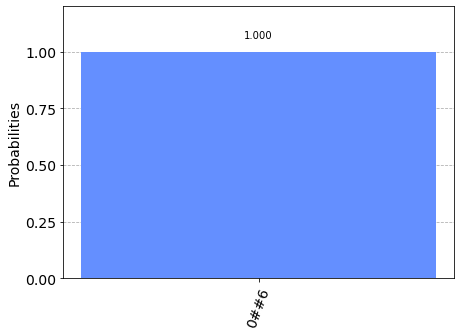

In [8]:
from qiskit_qudits import QuditCircuit
qdc = QuditCircuit([7], 1, 0)
qdc.ls(0, 0, 0, 6)
qdc.measure_all()
print(qdc)

import numpy as np
np.set_printoptions(linewidth=200, precision=2, suppress=True)
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
from qiskit_qudits.visualization import counts_to_quditcounts

simulator = Aer.get_backend('qasm_simulator') #simulation part
job = execute(qdc, simulator, shots=99)
counts = job.result().get_counts()
qd_counts = counts_to_quditcounts(qdc, counts)
plot_histogram(qd_counts)

In [2]:
import numpy as np
from qiskit_qudits import QuditCircuit
qdc = QuditCircuit([7], 1, 0)
qdc.sp(0, 0, 2, np.pi/4)
print(qdc)

from qiskit import Aer, execute
backend = Aer.get_backend('unitary_simulator')
np.set_printoptions(linewidth=200, precision=2, suppress=True)

job = execute(qdc, backend)
result = job.result()
U = result.get_unitary(qdc)

N = int(U.shape[0]/2)
print("Auxiliary qubit should start and end in state |0> (only look at top left of matrix)")
print(U[:N,:N])


      ┌────────────┐
qd_0: ┤0           ├
      │            │
qd_1: ┤1           ├
      │  SP(2,π/4) │
qd_2: ┤2           ├
      │            │
 q_0: ┤3           ├
      └────────────┘
Auxiliary qubit should start and end in state |0> (only look at top left of matrix)
[[1.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j  ]
 [0.  +0.j   1.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j  ]
 [0.  +0.j   0.  +0.j   0.71+0.71j 0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j  ]
 [0.  +0.j   0.  +0.j   0.  +0.j   1.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j  ]
 [0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   1.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j  ]
 [0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   1.  +0.j   0.  +0.j   0.  +0.j  ]
 [0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   1.  +0.j   0.  +0.j  ]
 [0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   0.  +0.j   1.  +0.j  ]